# Clustering of Breast Cancer Features

https://github.com/rlshuhart/MSDS7331_Project_3

## <U>Business Understanding
[10 points] Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific
dataset and the stakeholders needs?


"This initial phase focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition, and a preliminary plan designed to achieve the objectives. A decision model, especially one built using the Decision Model and Notation standard can be used."
1. What are the objectives?
2. What are the requirements?

### Define the Problem from 1 & 2
 * This is the problem...
    
### Preliminary Investigation Plan
 1. Step 1
 2. Step 2
 3. Step 3

## <U>Data Understanding
"The data understanding phase starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data, or to detect interesting subsets to form hypotheses for hidden information."

• [10 points] Describe the meaning and type of data (scale, values, etc.) for each
attribute in the data file. Verify data quality: Are there missing values? Duplicate data?
Outliers? Are those mistakes? How do you deal with these problems?

• [10 points] Visualize the any important attributes appropriately. Important: Provide an
interpretation for any charts or graphs.

## Initial collection 
* List sources:
 1. Source1
 
## Get visual
Are there any quality concerns?
* Missing data

Data Insights
* Highly correlated fields
* Highly Skewed data
* Interesting Subsets


In [15]:
# import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

# pandas_profiling is a handy tool for inspecting data
# https://github.com/JosPolfliet/pandas-profiling
# pip install pandas-profiling
import pandas_profiling

In [21]:
# load features data
features = pd.read_csv("./data/Features.txt.gz", sep="\t", header=None, compression ="gzip")
del features[117] #extra

feature_labels = []
for i in range(0,len(features.columns)):
    feature_labels.append("feature"+str(i))
    
features.columns = feature_labels

# load info data
info = pd.read_csv("./data/Info.txt.gz", sep="\t", header=None, compression ="gzip")
del info[11] #extra

# Add column labels
info_labels = ['isMalignant', 
               'ImageFindingID',
               'StudyFindingID',
               'ImageID',
               'StudyID',
               'isLeftBreast',
               'isMLO',
               'X-location', 
               'Y-location', 
               'X-nipple-location', 
               'Y-nipple-location']

info.columns = info_labels



#check row lengths the same
print("Are the row lengths the same? ", (features.shape[0] == info.shape[0]))
if (features.shape[0] == info.shape[0]) == True:
    print("Joining...")
    info_features = pd.concat([info,features], axis=1)

Are the row lengths the same?  True
Joining...


In [3]:
info_features.head()

,isMalignant,ImageFindingID,StudyFindingID,ImageID,StudyID,isLeftBreast,isMLO,X-location,Y-location,X-nipple-location,...,feature107,feature108,feature109,feature110,feature111,feature112,feature113,feature114,feature115,feature116
0,-1.0,0.0,0.0,100499.0,14280.0,1.0,1.0,35.0,3640.0,2543.0,...,-0.645245,1.349824,0.115955,-0.484219,1.631171,-0.308098,0.475939,0.490080,0.159805,-0.188335
1,-1.0,0.0,0.0,100499.0,14280.0,1.0,1.0,830.0,3401.0,2543.0,...,-1.243736,0.760832,0.933042,-3.023930,0.106013,-0.761170,0.903850,1.189868,0.438587,0.059610
2,-1.0,0.0,0.0,100499.0,14280.0,1.0,1.0,945.0,3096.0,2543.0,...,1.063587,-0.784538,-1.018942,0.376872,-0.547851,2.087434,-0.102905,-0.862409,0.564747,-0.369860
3,-1.0,0.0,0.0,100499.0,14280.0,1.0,1.0,1024.0,3089.0,2543.0,...,-0.528756,0.020521,-0.912619,-1.674896,-0.613157,1.263464,0.374131,-0.723305,0.734840,-0.255136
4,-1.0,0.0,0.0,100499.0,14280.0,1.0,1.0,1747.0,2922.0,2543.0,...,0.131424,-0.042808,0.512708,-1.506256,-0.196149,0.054295,0.885760,1.053582,0.666666,-0.136635


In [24]:
#profile = pandas_profiling.ProfileReport(info_features)
profile.to_file(outputfile=".\\myoutputfile.html")
profile

Number of variables,128
Number of observations,102294
Total Missing (%),0.0%
Total size in memory,99.9 MiB
Average record size in memory,1.0 KiB
Numeric,83
Categorical,0
Date,0
Text (Unique),0
Rejected,45
Distinct count,237


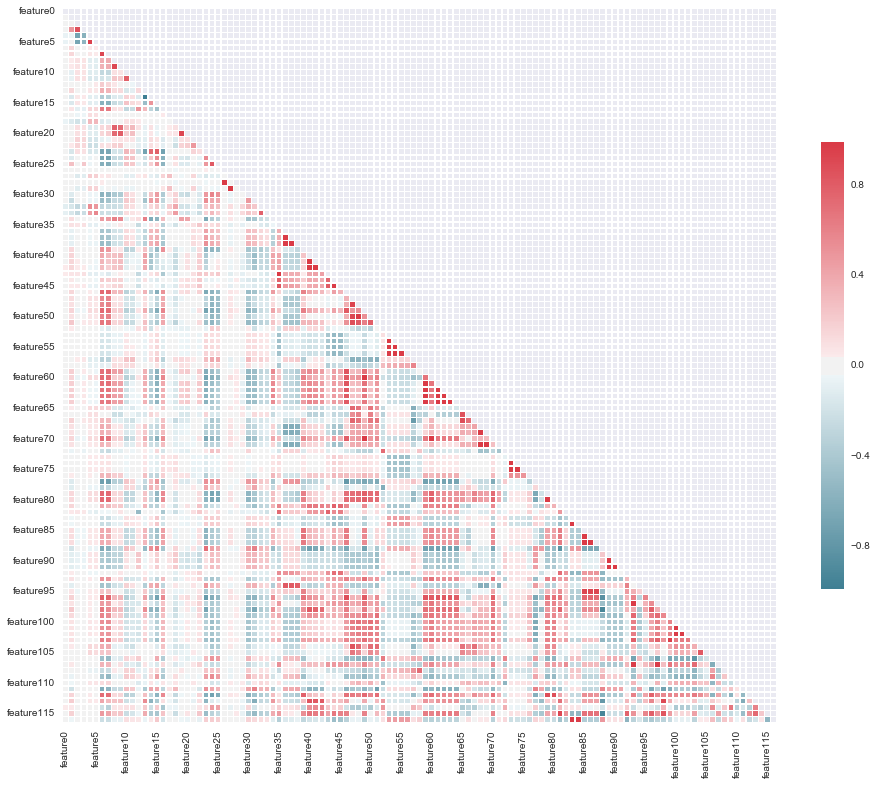

In [4]:
%matplotlib inline
# Compute the correlation matrix
corr = features.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

## <u>Data Preparation
"The data preparation phase covers all activities to construct the final dataset (data that will be fed into the modeling tool(s)) from the initial raw data. Data preparation tasks are likely to be performed multiple times, and not in any prescribed order. Tasks include table, record, and attribute selection as well as transformation and cleaning of data for modeling tools."


In [43]:
# Seperate target data and explanatory data to NumPy arrays
y = info['isMalignant'].values
X = features#.values

In [222]:
# Source: Python Machine Learning by Sebastian Raschka
# Create train and test sets using 80/20 split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.90, random_state=1)

X_train.shape

(10229, 117)

## Cluster Groups
break the features into groups and test clusters



In [215]:
%matplotlib inline
from sklearn.cluster import MiniBatchKMeans

def kmean_cluster_finder(X_train, X_test, feature_start, feature_stop, max_clusters):
    feature_selection = range(feature_start, feature_stop)
    print(feature_selection)

    clus_data_train = X_train.iloc[:,feature_selection].values
    clus_data_test = X_test.iloc[:,feature_selection].values

    scores = []
    range_values = np.arange(2, max_clusters)

    for i in range_values:
        # Train the model
        clus_pipe = Pipeline([('scl', StandardScaler()),
                        ('clf', MiniBatchKMeans(init='k-means++', n_clusters=i))])

        clus_pipe.fit(clus_data_train)
        score = metrics.silhouette_score(clus_data_train, clus_pipe.named_steps['clf'].labels_, 
                    metric='euclidean', sample_size=len(clus_data_train))

        #print("\nNumber of clusters =", i)
        #print("Silhouette score =", score)

        scores.append(score) 

    # higher the better
    best_cluster = range_values[np.argmax(scores)]
    print("best cluster is: ", best_cluster)
    plt.figure()
    plt.bar(range_values, scores, width=0.6, color='k', align='center')
    plt.title('Silhouette score vs number of clusters')
    plt.show()
    
    clus_pipe = Pipeline([('scl', StandardScaler()),
                          ('clf', MiniBatchKMeans(init='k-means++', n_clusters=best_cluster))])

    clus_pipe.fit(clus_data_train)
    clus_data_train_labels = clus_pipe.named_steps['clf'].labels_
    
    clus_pipe.fit(clus_data_test)
    clus_data_test_labels = clus_pipe.named_steps['clf'].labels_
    
    return clus_data_train_labels, clus_data_test_labels

#kmean_cluster_finder(X_train, 0,6,10)
#kmean_cluster_finder(X_train, 6,12,10)


[  0  15  30  45  60  75  90 105]
[ 15  30  45  60  75  90 105 117]
range(0, 15)
best cluster is:  2


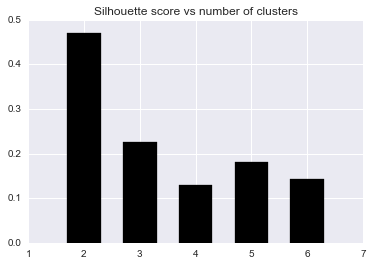

range(15, 30)
best cluster is:  2


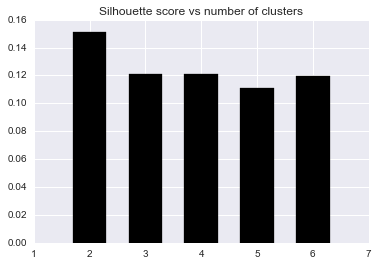

range(30, 45)
best cluster is:  2


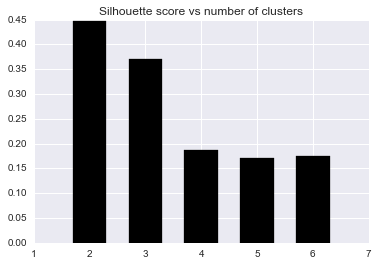

range(45, 60)
best cluster is:  3


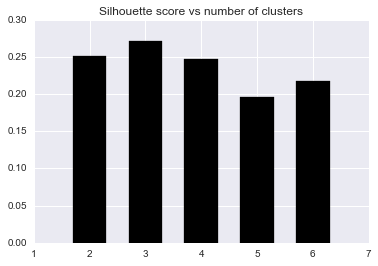

range(60, 75)
best cluster is:  2


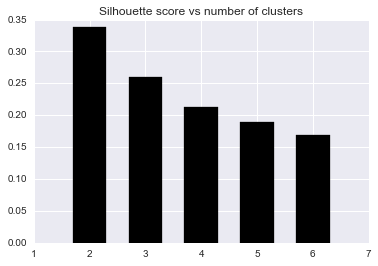

range(75, 90)
best cluster is:  2


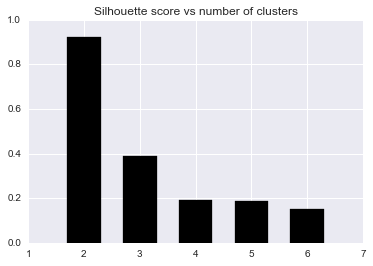

range(90, 105)
best cluster is:  2


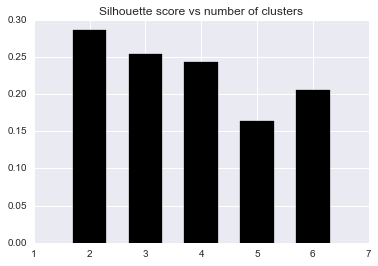

range(105, 117)
best cluster is:  3


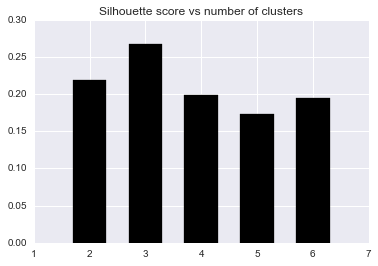

done. It took 12.236223459243774 seconds.


In [217]:
# This take a while
def kmeans_data(X_train, X_test, cluster_every = 15):
    start_list = np.arange(0, 117, cluster_every)
    end_list = np.append(np.arange(cluster_every, 117, cluster_every), 117)
    print(start_list)
    print(end_list)

    df_train = pd.DataFrame()
    df_test = pd.DataFrame()

    start = time.time()
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore",category=DeprecationWarning)
        for s, f in zip(start_list, end_list):
            df_train['features'+str(s)+"_"+str(f)] , df_test['features'+str(s)+"_"+str(f)] = kmean_cluster_finder(X_train, X_test, s,f,7)
        print('done. It took', time.time()-start, 'seconds.')

    return df_train, df_test
    
X_train_km, X_test_km = kmeans_data(X_train, X_test, cluster_every = 15)

## <u>Modeling
"In this phase, various modeling techniques are selected and applied, and their parameters are calibrated to optimal values. Typically, there are several techniques for the same data mining problem type. Some techniques have specific requirements on the form of data. Therefore, stepping back to the data preparation phase is often needed."

Different tasks will require different evaluation methods. Be as thorough as possible when analyzing
the data you have chosen and use visualizations of the results to explain the performance and
expected outcomes whenever possible. Guide the reader through your analysis with plenty of
discussion of the results. Each option is broken down by:

* [10 Points] Train and adjust parameters
* [10 Points] Evaluate and Compare
* [10 Points] Visualize Results
* [20 Points] Summarize the Ramifications

Option A: Cluster Analysis
* Train: Perform cluster analysis using several clustering methods (adjust parameters).
* Eval: Use internal and/or external validation measures to describe and compare the
clusterings and the clusters— how did you determine a suitable number of clusters for
each method?
* Visualize: Use tables/visualization to discuss the found results. Explain each
visualization in detail.
* Summarize: Describe your results. What findings are the most interesting and why?

In [208]:
#Logistic Regression Base line
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

###############################################################################
########################## Logistic Regression Pipe ###########################
###############################################################################
clf_name='Logistic Regression'
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=1))])
param_grid_lr = [{'clf__C': [.1,1,10],
                  'clf__penalty': ['l1','l2'],
                  'clf__class_weight': ['balanced', None]}]
payload_lr = [clf_name, pipe_lr, param_grid_lr]

###############################################################################
########################## Kmeeans Pipe ###########################
###############################################################################

clf_name='Mini Batch Kmeans'
payload_km = [clf_name, pipe_lr, param_grid_lr]

In [19]:
# Source: Python Machine Learning by Sebastian Raschka
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
import warnings

# http://scikit-learn.org/stable/modules/model_evaluation.html
"""
Per documentation on Scikit-Learn regarding cross validation (cv) parameter, 
"For integer/None inputs, if y is binary or multiclass, StratifiedKFold used. If the 
estimator is a classifier or if y is neither binary nor multiclass, KFold is used."
"""

def grid_searcher2(X_train, y_train, payload):
    start = time.time()
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        gs = GridSearchCV(estimator=payload[1], 
                          param_grid=payload[2], 
                          scoring='f1', 
                          cv=10,
                          n_jobs=-1)

        gs = gs.fit(X_train, y_train)
        print(payload[0])
        print("Best F-Score: ", gs.best_score_)
        print("Best Parameters: ", gs.best_params_)
        print("Best Estimator: ", gs.best_estimator_)
    print('done. It took', time.time()-start, 'seconds to perform grid search.')
    return gs


import pickle
skip_gs = 'y'

if skip_gs == 'n':
    # Run Logistic Regression for baseline
    print("running grid search...")
    gs_lr = grid_searcher2(X_train, y_train, payload_lr)
    filename = 'lr_grid_search.sav'
    pickle.dump(gs_lr, open(filename, 'wb'))
    print("done pickling")
elif skip_gs != 'n':
    gs_lr = pickle.load(open(filename, 'rb'))
    print(gs_lr.best_estimator_)

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


In [218]:
gs_km = grid_searcher2(X_train_km, y_train, payload_km)

Mini Batch Kmeans
Best F-Score:  0.0388685287315
Best Parameters:  {'clf__class_weight': 'balanced', 'clf__penalty': 'l1', 'clf__C': 1}
Best Estimator:  Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=1,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])
done. It took 7.874787330627441 seconds.


## <u>Evaluation
"At this stage in the project you have built a model (or models) that appears to have high quality, from a data analysis perspective. Before proceeding to final deployment of the model, it is important to more thoroughly evaluate the model, and review the steps executed to construct the model, to be certain it properly achieves the business objectives. A key objective is to determine if there is some important business issue that has not been sufficiently considered. At the end of this phase, a decision on the use of the data mining results should be reached."

### Baseline Evaluation

Logistic Regression
done. It took 0.22002220153808594 seconds to fit model.
****************************************************
Classification Report:
Accuracy: 0.988
AUC: 0.860
             precision    recall  f1-score   support

       -1.0       1.00      0.99      0.99    100657
        1.0       0.18      0.27      0.22       615

avg / total       0.99      0.99      0.99    101272

****************************************************


done. It took 0.01400136947631836 seconds to fit model.
****************************************************
Classification Report:
Accuracy: 0.522
AUC: 0.592
             precision    recall  f1-score   support

       -1.0       1.00      0.52      0.68    100657
        1.0       0.01      0.77      0.02       615

avg / total       0.99      0.52      0.68    101272

****************************************************




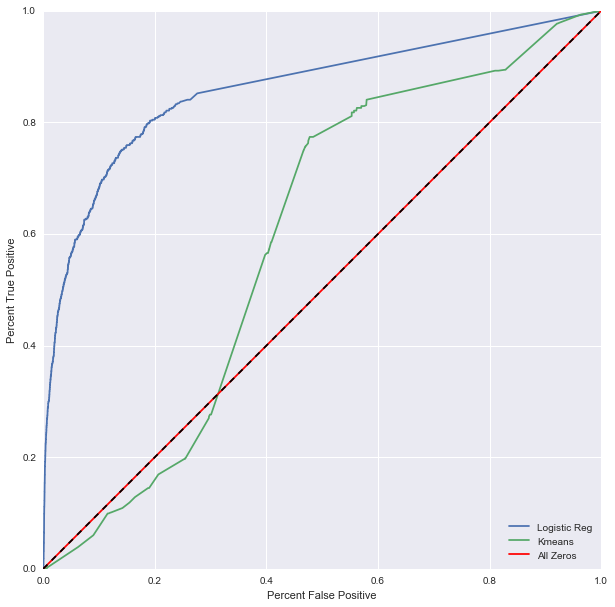

In [220]:
%matplotlib inline
# Source: Python Machine Learning by Sebastian Raschka
# Create train and test sets using 80/20 split
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# Make ROC Curve
def roc_data(gs, X_train, y_train, X_test, y_test):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        best_clf = gs.best_estimator_
        start = time.time()
        best_clf.fit(X_train, y_train)
        print('done. It took', time.time()-start, 'seconds to fit model.')
        y_pred_proba = best_clf.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        y_pred = best_clf.predict(X_test)
        print("****************************************************")
        print("Classification Report:")
        print("Accuracy: %.3f" % accuracy_score(y_test, y_pred))
        print("AUC: %.3f" % roc_auc_score(y_test, y_pred_proba))
        print(classification_report(y_test, y_pred))
        print("****************************************************")
        print("\n")
    return fpr, tpr

print("Logistic Regression")
fpr_lr, tpr_lr = roc_data(gs_lr, X_train, y_train, X_test, y_test)
fpr_km, tpr_km = roc_data(gs_km, X_train_km, y_train, X_test_km, y_test)
fpr_zero, tpr_zero, _ = roc_curve(y_test, np.array([-1]*len(y_test)))

plt.figure(figsize=(10, 10))
plt.plot(fpr_lr, tpr_lr, label='Logistic Reg')
plt.plot(fpr_km, tpr_km, label='Kmeans')
plt.plot(fpr_zero, tpr_zero, label='All Negatives', color="red")# Equivalent to Diagonal
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc="lower right")
plt.xlabel('Percent False Positive')
plt.ylabel('Percent True Positive')
plt.show()

## <u>Deployment
"Creation of the model is generally not the end of the project. Even if the purpose of the model is to increase knowledge of the data, the knowledge gained will need to be organized and presented in a way that is useful to the customer. Depending on the requirements, the deployment phase can be as simple as generating a report or as complex as implementing a repeatable data scoring (e.g. segment allocation) or data mining process. In many cases it will be the customer, not the data analyst, who will carry out the deployment steps. Even if the analyst deploys the model it is important for the customer to understand up front the actions which will need to be carried out in order to actually make use of the created models."

Be critical of your performance and tell the reader how you current model might be usable by
other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling?
* How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)?
* How would your deploy your model for interested parties?
* What other data should be collected?